### Building DNN from scratch for Classification

This notebook is coded as a part of learning while taking Deeplearning.ai specialization course

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Initialize parameters W, b

Weight parameters are initialized with small random values.

Usage: init_parameters(a)

where a is an array of size of layers including input, hidden & output layers

In [2]:
def init_parameters(layers_size,factor):
  np.random.seed(3)
  parameters={}
  for i in range(1,len(layers_size)):
    parameters['W'+str(i)]=np.random.randn(layers_size[i],layers_size[i-1])*np.sqrt(2/layers_size[i])*factor
    parameters['b'+str(i)]=np.zeros((layers_size[i],1))
  return parameters

#### Forward Propagation
Usage: act_func is an array of activation functions refering to hidden and output layers. Example: ['ReLU', 'Tanh', 'Sigmoid'] 

Supported functions: LReLU, Tanh, Sigmoid, Linear, ReLU (default)

In [3]:
def forward_prop(X_in,param,act_func):
  L = len(act_func)
  cache = {}
  cache['A0']=X_in
  assert(len(param.keys())/2==L)
  for i in range(1,L+1):
    cache['Z'+str(i)] = np.dot(param['W'+str(i)],cache['A'+str(i-1)])+param['b'+str(i)]
    cache['A'+str(i)] = activation(act_func[i-1],cache['Z'+str(i)])
    assert(cache['Z'+str(i)].shape[0]==param['W'+str(i)].shape[0])
    assert(cache['Z'+str(i)].shape[1]==cache['A'+str(i-1)].shape[1])
  return cache
    
#Activation Functions are defined as follows
  
relu = lambda t: max(0,t)
ReLU_func = np.vectorize(relu,otypes=[np.float64]) 

lrelu = lambda t: max(0.01*t,t)
LReLU_func = np.vectorize(lrelu,otypes=[np.float64])

tanh = lambda t: (np.exp(t)-np.exp(-t))/(np.exp(t)+np.exp(-t))
Tanh_func = np.vectorize(tanh,otypes=[np.float64]) 

sigmoid = lambda t:1/(1+np.exp(-t))
Sigmoid_func = np.vectorize(sigmoid,otypes=[np.float64])
  
def activation(func,Z):
  if func == 'ReLU':
    A = ReLU_func(Z)
  elif func == 'Tanh':
    A = Tanh_func(Z)
  elif func == 'Sigmoid':
    A = Sigmoid_func(Z)
  elif func == 'LReLU':
    A = LReLU_func(Z)
  elif func == 'Linear':
    A = Z
  else:
    A = ReLU_func(Z)
  return A

#### Computing Cost

The function cost function is coded for a binary classification

In [4]:
def compute_cost(AL,Y):
  assert(AL.shape==Y.shape)
  m = Y.shape[1]
  cost = -1/m*np.sum(np.multiply(np.log(AL),Y)+np.multiply(np.log(1-AL),1-Y))
  assert(np.array([cost]).shape==(1,))
  return cost

#### Back Propagation

Computes gradients of parameters W, b for all layers

In [5]:
def back_prop(Y,parameters,cache,act_func):
  L = len(act_func)
  grad = {}
  AL = cache['A'+str(L)]
  m = Y.shape[1]
  #dAL is computed by taking logistic regressions's cost function
  
  Y_temp = Y-1
  AL_temp = AL-1
  grad['dA'+str(L)] = (np.divide(Y_temp,AL_temp)-np.divide(Y,AL))
  assert(grad['dA'+str(L)].shape == AL.shape)
  
  for i in range(L,0,-1):
    grad['dZ'+str(i)] = np.multiply(grad['dA'+str(i)],actfunc_derv(cache['Z'+str(i)],act_func[i-1]))
    grad['dW'+str(i)] = 1/m*np.dot(grad['dZ'+str(i)],cache['A'+str(i-1)].T)
    grad['db'+str(i)] = 1/m*np.sum(grad['dZ'+str(i)],axis=1,keepdims=True)
    grad['dA'+str(i-1)] = np.dot(parameters['W'+str(i)].T,grad['dZ'+str(i)])
  return grad


relu_inv = lambda t: 1 if t>=0 else 0
ReLU_inv = np.vectorize(relu_inv,otypes=[np.float64]) 

lrelu_inv = lambda t: 1 if t>=0 else 0.01
LReLU_inv = np.vectorize(lrelu_inv,otypes=[np.float64]) 

def actfunc_derv(Z,func): # gives activation function's derivative value
  if func == 'ReLU':
    g_Z = ReLU_inv(Z)
  elif func == 'Sigmoid':
    a = Sigmoid_func(Z)
    g_Z = np.multiply(a,1-a)
  elif func == 'LReLU':
    g_Z = LReLU_inv(Z)
  elif func == 'Tanh':
    a = Tanh_func(Z)
    g_Z = 1-np.square(a)
  elif func == 'Linear':
    g_Z = 1
  else:
    assert(1==0)
  return g_Z

#### Update weights

In [6]:
def update_param(parameters,grad,alpha):
  L = int(len(parameters.keys())/2)
  for i in range(1,L+1):
    assert(parameters['W'+str(i)].shape==grad['dW'+str(i)].shape)
    parameters['W'+str(i)] = parameters['W'+str(i)] - alpha*grad['dW'+str(i)]
    parameters['b'+str(i)] = parameters['b'+str(i)] - alpha*grad['db'+str(i)]
  return parameters

#### Generating random data for testing algorithm

0.50875


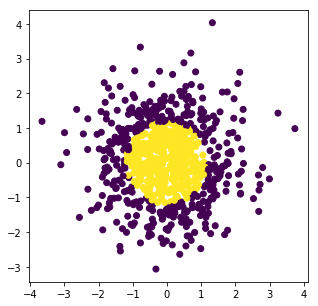

In [7]:
size = 800
x_train_raw = np.random.randn(2,size)
y_train_raw = np.sum(np.square(x_train_raw),axis=0,keepdims=True)<1.41
x_test_raw = np.random.randn(2,round(0.3*size))
y_test_raw = np.sum(np.square(x_test_raw),axis=0,keepdims=True)<1.41

print(np.sum(y_train_raw)/y_train_raw.shape[1])
x1 = x_train_raw[0].reshape(1,size)
x2 = x_train_raw[1].reshape(1,size)
plt.figure(figsize=(5,5))
plt.scatter(x1,x2,c=y_train_raw)

In [8]:
def standardize(x_train,x_test,active): #here x has samples as columns and rows are features
  if active==True:
    mean = np.mean(x_train,axis=1,keepdims=True)
    stdev = np.std(x_train,axis=1,keepdims=True)
    x_train_std = np.divide((x_train-mean),stdev)
    x_test_std = np.divide((x_test-mean),stdev)
  else:
    x_train_std = x_train
    x_test_std = x_test
  return x_train_std,x_test_std

In [9]:
def predict(X_test,param,activation,threshold):
  Y_predict = forward_prop(X_test,param,activation)['A'+str(len(activation))]>0.5
  return Y_predict

def score(Y_predict,Y_actual):
  score = np.sum(Y_actual == Y_predict)/Y_actual.shape[1]
  return score

In [10]:
#Initializaiton of few variables
chk = 0
param_cache = {}

#### Putting everything together

In [11]:
[x_train,x_test] = standardize(x_train_raw,x_test_raw,active=False)

X = x_train
Y = y_train_raw
X_test = x_test
Y_test = y_test_raw

###### INPUTS #######

hidden_layers_sizes = [5,3]                  # [2,2,2]-implies 3 hidden layers with 2 units each
activation_func = ['ReLU','Tanh','Sigmoid']  # ['ReLU','ReLU','Sigmoid'] means 1st & 2nd hidden layers are ReLU based and last layer is Sigmoid
iterations = 1500                             # No of iterations for updating parameters
alpha = 0.08                                 # Learning rate
factor = 1                                   # factor multiplying init parameters
reinit = True                               #"False" implies - last run parameters are used, "True" implies fresh parameters are initialized

#####################

assert(len(hidden_layers_sizes)+1 == len(activation_func))
L = len(activation_func)
layer_size = np.append(hidden_layers_sizes,Y.shape[0])
layer_size = np.insert(layer_size,0,X.shape[0])

  
if reinit == True:
  chk = 1
else:
  chk = chk+1
  
if chk == 1:    #to avoid reinitializing with random parameters and continue with existing parameters
  param = init_parameters(layer_size,factor)
  cost = []
  cost_test = []
  

for i in range(iterations):
  values = forward_prop(X,param,activation_func)
  cost = np.append(cost,compute_cost(values['A'+str(L)],Y))
  gradients = back_prop(Y,param,values,activation_func)
  param = update_param(param,gradients,alpha)
  values_test = forward_prop(X_test,param,activation_func)
  cost_test = np.append(cost_test,compute_cost(values_test['A'+str(L)],Y_test))  
  
param_cache[chk] = param   #stores the parameters at each run of this section 

Status: The values of gradients are approaching zero in deep NN - Gradient Vanishing problem?

The gradients are highly sensitive to the intialization of parameters - I used xavier initialization to solve this

#### Plotting convergence (cost vs iterations)

Text(0, 0.5, 'Cost')

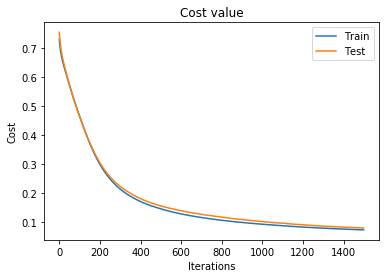

In [12]:
plt.plot(cost)
plt.plot(cost_test)
plt.legend(('Train','Test'))
plt.title("Cost value")
plt.xlabel('Iterations')
plt.ylabel('Cost')

#### Score of algorithm

In [13]:
Y_pred = predict(X,param,activation_func,0.5)
score_value = score(Y_pred,Y)
print("Prediction score on train set is ",round(score_value,3))

Y_pred = predict(X_test,param,activation_func,0.5)
score_value = score(Y_pred,Y_test)
print("Prediction score on test set is ",round(score_value,3))

Prediction score on train set is  0.98
Prediction score on test set is  0.971


#### Plot the decision boundary

In [14]:
def plot_boundary(param,Act_func,xmin,xmax,dx):
  x_r = np.arange(xmin,xmax,dx)
  x = np.array(np.meshgrid(x_r,x_r)).T.reshape(-1,2).T
  y = predict(x,param,Act_func,0.5)
  plt.scatter(x[1,],x[0,],c=y[0])

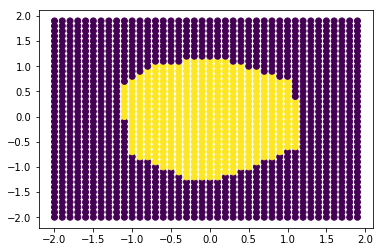

In [15]:
plot_boundary(param,activation_func,-2,2,0.1)